<a href="https://colab.research.google.com/github/sefahw/machine-learning-assignment/blob/main/classification_of_irises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
data= load_iris()
x=pd.DataFrame(data.data, columns=["sepal_length","sepal_width", "petal_length","petal_width"])
y=pd.DataFrame(data.target,columns=["variety"])
new_x=x[["sepal_length","petal_length"]]
df=pd.concat([new_x,y],axis=1)
subset=df.loc[(df['variety']==1)|(df['variety']==2)].reset_index(drop=True)
subset.head()

,sepal_length,petal_length,variety
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


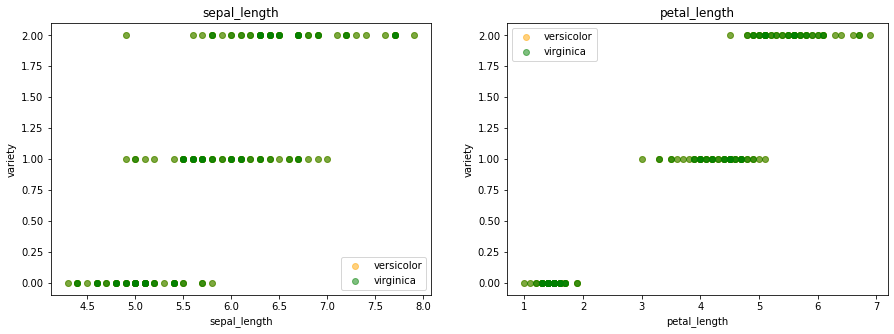

In [17]:
import numpy as np
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(15,5))
variety_names=['versicolor','virginica']
x_features=['sepal_length','petal_length']
colors=['orange','green']
for x_feature in range(len(x_features)):
    for a in range(len(variety_names)):
        ax1=figure.add_subplot(1,2,x_feature +1)
        ax1.scatter(df[x_features[x_feature]],df['variety'],color=colors[a],label=variety_names[a], alpha=0.5)
    ax1.legend()
    ax1.set_title(x_features[x_feature])
    ax1.set_xlabel(x_features[x_feature])
    ax1.set_ylabel('variety')

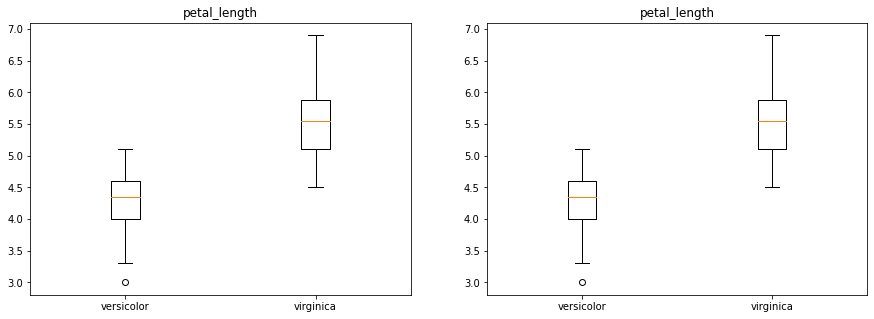

In [18]:
fig=plt.figure(figsize=(15,5))
import seaborn as sns
for feature in range(len(x_features)):
    x=[]
    for i in range(len(variety_names)):
        target_variety=df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[x_feature]]))
    ax2=fig.add_subplot(1,2,feature+1)
    ax2.boxplot(x)
    ax2.set_xticks([1,2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[x_feature])

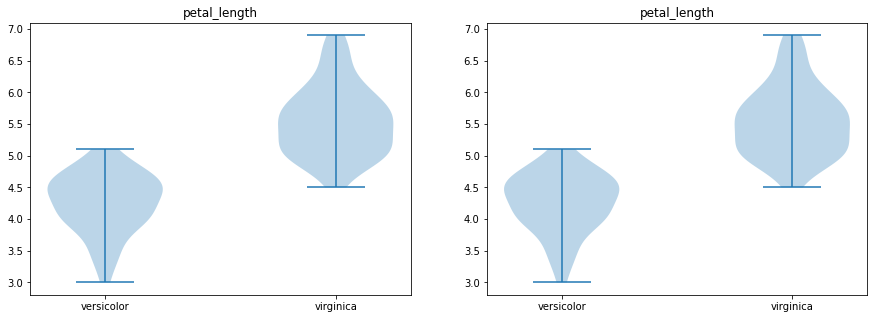

In [19]:
fig=plt.figure(figsize=(15,5))
import seaborn as sns
for feature in range(len(x_features)):
    x=[]
    for i in range(len(variety_names)):
        target_variety=df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[x_feature]]))
    ax2=fig.add_subplot(1,2,feature+1)
    ax2.violinplot(x)
    ax2.set_xticks([1,2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[x_feature])

In [20]:
from scipy.sparse.construct import random
import numpy as np
from sklearn.model_selection import train_test_split
x=np.array(subset.loc[:,["sepal_length","petal_length"]])
y=np.array(subset["variety"])
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
Scalar=StandardScaler()
Scalar.fit(x_train)
x_train_trans=Scalar.transform(x_train)
x_test_trans=Scalar.transform(x_train)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
k_neigh_3=KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(x_train_trans,y_train.ravel())
pred_3=k_neigh_3.predict(x_test_trans)
print("pred3=",pred_3)
k_neigh_5=KNeighborsClassifier(n_neighbors=5)
k_neigh_5.fit(x_train_trans,y_train.ravel())
pred_5=k_neigh_5.predict(x_test_trans)
print("pred5=",pred_5)
k_neigh_1=KNeighborsClassifier(n_neighbors=1)
k_neigh_1.fit(x_train_trans,y_train.ravel())
pred_1=k_neigh_1.predict(x_test_trans)
print("pred1=",pred_1)


pred3= [1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2
 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 1 2 2 2 1 2 2 1 2
 2]
pred5= [1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2
 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2 1 2 2 1 2
 2]
pred1= [1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2
 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 2 1 2 2 1 2
 2]


In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predictions=[pred_3,pred_5,pred_1]
keys=["knn3","knn5","knn1"]
for a,prediction in enumerate(predictions,0):
    print("predictions of",keys[a])
    print("accuracy = ",accuracy_score(y_true=y_test,y_pred=prediction))
    print("precision = ",precision_score(y_true=y_test,y_pred=prediction,average=None))
    print("recall = ", recall_score(y_true=y_test,y_pred=prediction, average=None))
    print("f1 score =",f1_score(y_true=y_test,y_pred=prediction,average=None))
    print("confusion matrix = ",confusion_matrix(y_true=y_test,y_pred=prediction))
    print(".....................................................................")


predictions of knn3


ValueError: ignored

IndexError: ignored

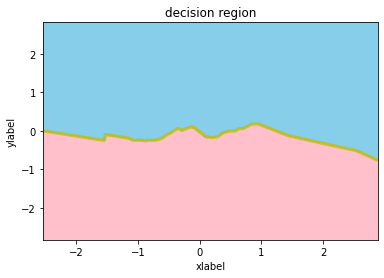

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models=[k_neigh_3,k_neigh_5,k_neigh_1]
for a,model in enumerate(models,1):
    decision_region(x_test_trans,y_test,model)

In [ ]:
from sklearn.linear_model import LogisticRegression
1R_fit=LogisticRegression(random_state=0).fit(x_test_trans,y_train)
1R_predict=1R_fit.predict(x_test_trans)
display_outputs('Logical Regression', 1R_predict,1R_fit,std=True)

In [ ]:
from numpy.core.fromnumeric import std
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf=make_pipeline(StandardScaler(),SVC(gamma='auto'))
clf.fit(x_train_trans,y_train)
clf_pred=clf.predict(x_test_trans)
display_outputs('SVM',clf_pred,clf, std=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTC= DecisionTreeClassifier(random_state=0)
dTc.fit(x_test_trans,y_train)
dTC_pred=dTC.predict(x_test_trans)
display_outputs('Decision tree',dTC_pred,dTC,std=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rFC=RandomForestClassifier(max_depth=2,random_state=0)
rFC.fit(x_train_trans,y_train)
rFC_pred=rFC.predict(x_test_trans)
display_outputs('Random Forest',rFC_pred,rFc,std=True)